## В данной работе рассматривается 4 метода машинного обучения на примере цветков ириса. Строятся решающие области для наглядного преставления.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
frame = pd.DataFrame(iris.data, columns = iris.feature_names)
frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
frame['target'] = iris.target
frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
frame['flower_name'] = frame.target.apply(lambda x: iris.target_names[x])
frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [8]:
accuracy_SVM = []

def train_SVM(X,Y):
    X_new = X.to_numpy()
    Y_new = Y.to_numpy()
    X_train, X_test, Y_train, Y_test = train_test_split(X_new,Y_new, test_size = 0.2)
    model = SVC(C = 10.0, kernel = 'linear')
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    accuracy_SVM.append(score)
    figure = plt.figure(figsize = (12,9))
    plot_decision_regions(X_new,Y_new, clf = model, zoom_factor = 1, X_highlight = X_test)
    plt.xlabel('Sepal length (cm)', fontsize = 15, fontweight = 'bold')
    plt.ylabel('Petal length (cm)',fontsize = 15, fontweight = 'bold')
    plt.title('SupportVectorMachine',fontsize = 20, fontweight = 'bold')
    print ('')
    plt.show()
    print (' ')
    print ("Train:", model)    

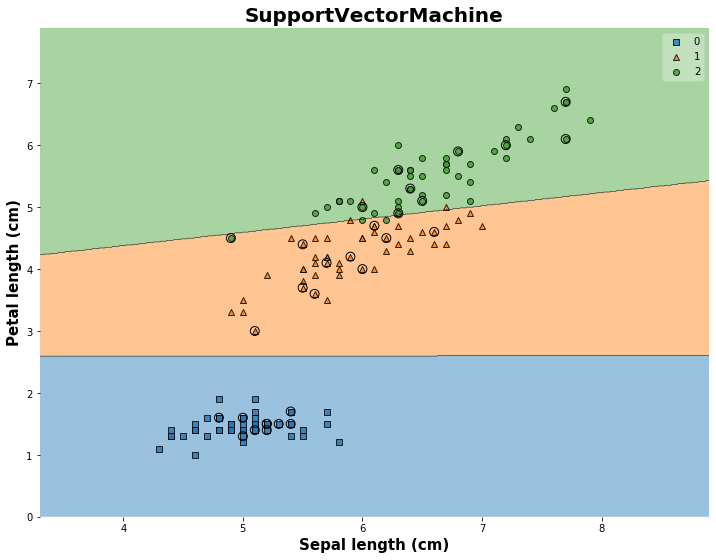

 
Train: SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
 
 
Accuracy_SVM: [0.9333333333333333]


In [9]:
train_SVM(frame.drop(['target','flower_name','sepal width (cm)', 'petal width (cm)' ], axis = 'columns'), frame.target)
print (' ')
print (' ')
print ("Accuracy_SVM:" ,accuracy_SVM)

In [10]:
accuracy_RF = []

def train_RF(X,Y):
    X_new = X.to_numpy()
    Y_new = Y.to_numpy()
    X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size = 0.2)
    model = RandomForestClassifier(n_estimators = 20)
    model.fit(X_train,Y_train)
    score = model.score(X_test, Y_test)
    accuracy_RF.append(score)
    figure = plt.figure(figsize = (12,9))
    plot_decision_regions(X_new,Y_new, clf = model, zoom_factor = 1, X_highlight = X_test)
    plt.xlabel('Sepal length (cm)', fontsize = 15, fontweight = 'bold')
    plt.ylabel('Petal length (cm)',fontsize = 15, fontweight = 'bold')
    plt.title('RandomForestClassifier',fontsize = 20, fontweight = 'bold')
    print ('')
    plt.show()
    print (' ')
    print ("Train:", model)    

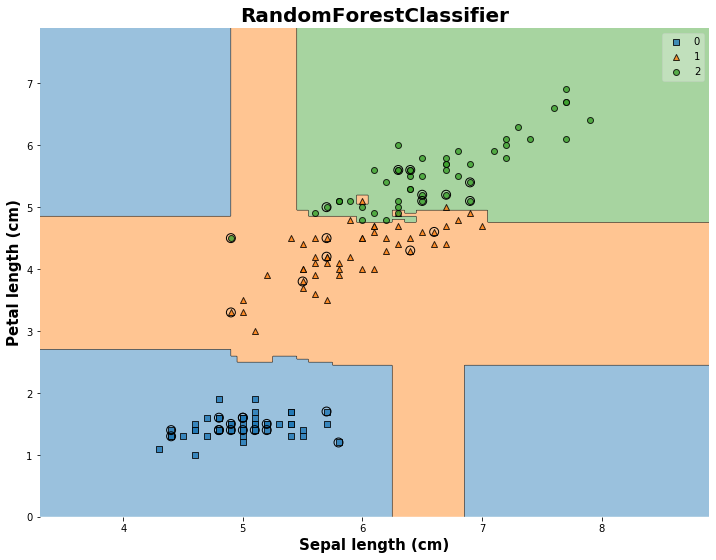

 
Train: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
 
 
Accuracy_RF: [0.9666666666666667]


In [11]:
train_RF(frame.drop(['target','flower_name','sepal width (cm)', 'petal width (cm)' ], axis = 'columns'), frame.target)
print (' ')
print (' ')
print ("Accuracy_RF:" ,accuracy_RF) 

In [12]:
accuracy_LR = []

def train_LR(X,Y):
    X_new = X.to_numpy()
    Y_new = Y.to_numpy()
    X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size = 0.2)
    model = LogisticRegression(solver = 'liblinear', C = 10.)
    model.fit(X_train,Y_train)
    score = model.score(X_test, Y_test)
    accuracy_LR.append(score)
    figure = plt.figure(figsize = (12,9))
    plot_decision_regions(X_new,Y_new, clf = model, zoom_factor = 1, X_highlight = X_test)
    plt.xlabel('Sepal length (cm)', fontsize = 15, fontweight = 'bold')
    plt.ylabel('Petal length (cm)',fontsize = 15, fontweight = 'bold')
    plt.title('LogisticRegression',fontsize = 20, fontweight = 'bold')
    print ('')
    plt.show()
    print (' ')
    print ("Train:", model)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


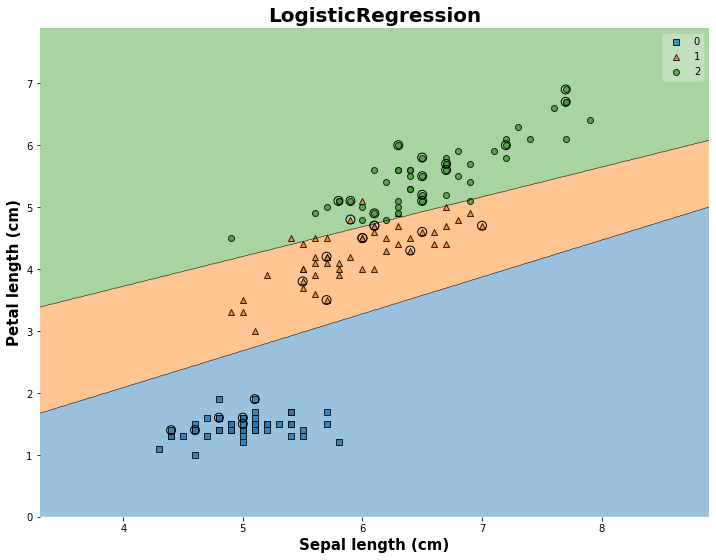

 
Train: LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
 
 
Accuracy_LR: [0.9666666666666667]


In [13]:
train_LR(frame.drop(['target','flower_name','sepal width (cm)', 'petal width (cm)' ], axis = 'columns'), frame.target)
print (' ')
print (' ')
print ("Accuracy_LR:" ,accuracy_LR) 

In [14]:
accuracy_DT = []

def train_DT(X,Y):
    X_new = X.to_numpy()
    Y_new = Y.to_numpy()
    X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size = 0.2)
    model = DecisionTreeClassifier(criterion = 'gini')
    model.fit(X_train,Y_train)
    score = model.score(X_test, Y_test)
    accuracy_DT.append(score)
    figure = plt.figure(figsize = (12,9))
    plot_decision_regions(X_new,Y_new, clf = model, zoom_factor = 1, X_highlight = X_test)
    plt.xlabel('Sepal length (cm)', fontsize = 15, fontweight = 'bold')
    plt.ylabel('Petal length (cm)',fontsize = 15, fontweight = 'bold')
    plt.title('DecisionTree',fontsize = 20, fontweight = 'bold')
    print ('')
    plt.show()
    print (' ')
    print ("Train:", model)

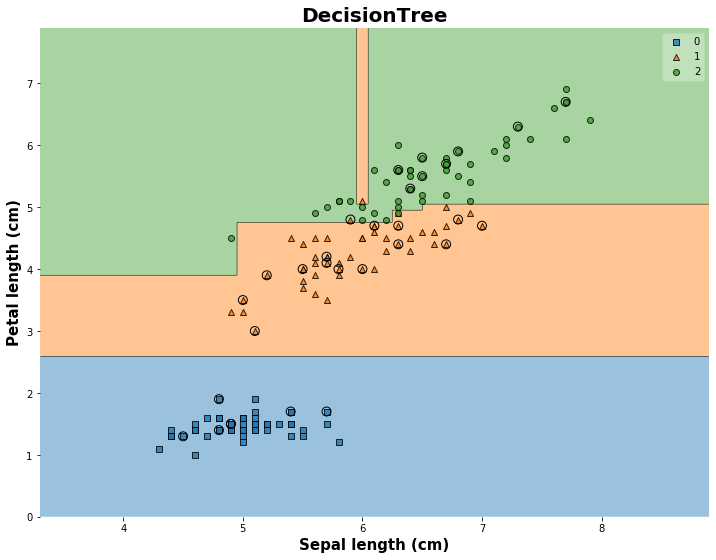

 
Train: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
 
 
Accuracy_DT: [0.9666666666666667]


In [15]:
train_DT(frame.drop(['target','flower_name','sepal width (cm)', 'petal width (cm)' ], axis = 'columns'), frame.target)
print (' ')
print (' ')
print ("Accuracy_DT:" ,accuracy_DT) 